<a href="https://colab.research.google.com/github/Swagat-modder/DA-DS-portfolio/blob/main/Breast_Cancer_Prediction(Logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [9]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
458,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.340,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
160,B,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,...,13.320,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987
151,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.53810,0.07879,0.3322,0.14860
339,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,...,30.670,30.73,202.40,2906.0,0.1515,0.2678,0.48190,0.20890,0.2593,0.07738
369,M,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,...,27.660,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574
199,M,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,...,18.330,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
216,B,11.890,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,...,13.250,27.10,86.20,531.2,0.1405,0.3046,0.28060,0.11380,0.3397,0.08365
237,M,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,...,24.220,26.17,161.70,1750.0,0.1228,0.2311,0.31580,0.14450,0.2238,0.07127
168,M,17.470,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,23.140,32.33,155.30,1660.0,0.1376,0.3830,0.48900,0.17210,0.2160,0.09300
394,B,12.100,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,0.1937,...,13.560,25.80,88.33,559.5,0.1432,0.1773,0.16030,0.06266,0.3049,0.07081


In [10]:
df.diagnosis=[1 if value=='M' else 0 for value in df.diagnosis]

In [11]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
481,0,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,...,16.41,26.42,104.40,830.5,0.1064,0.1415,0.16730,0.08150,0.2356,0.07603
199,1,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
384,0,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,...,14.24,17.37,96.59,623.7,0.1166,0.2685,0.28660,0.09173,0.2736,0.07320
533,1,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,...,23.23,27.15,152.00,1645.0,0.1097,0.2534,0.30920,0.16130,0.3220,0.06386
438,0,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,...,15.63,28.01,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911


In [12]:
df.diagnosis=df['diagnosis'].astype('int')

<Axes: xlabel='diagnosis'>

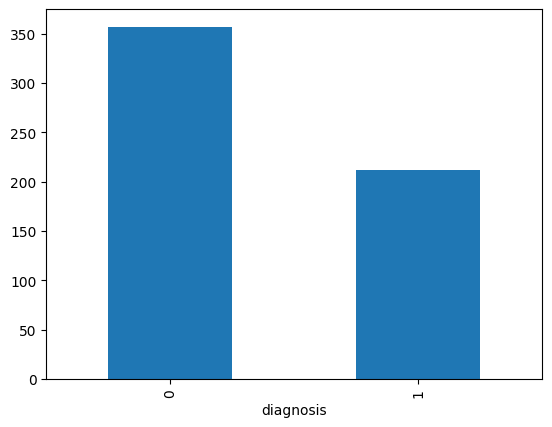

In [13]:
df.diagnosis.value_counts().plot(kind='bar')

In [15]:
#dividing into target and predictor variable
y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)

**Normalization od data**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

**Training and Fitting the model**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred=lr.predict(X_test)

**Evaluation**

In [21]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print(ac)

0.9824561403508771


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

